# 3. Asking meaningful questions

**1. How does air quality differ across various seasons?**
- Answering this question will:
    - Reveal seasonal variations in air quality
    - Help understand environmental and climatic impacts on air pollution
    - Provide insights for public health and environmental policy
- How we answer this question:
    - Data Preparation:
        - Use Python with pandas for data manipulation
        - Calculate US Air Quality Index (AQI) for each measurement
        - Categorize data by seasons (Spring, Summer, Autumn, Winter)
        - Split countries into continental regions
    - Analysis Techniques:
        - Calculate average AQI for each season and continent
        - Create visualizations to demonstrate seasonal variations
        - Statistical tests to validate significant differences
- Visualization Strategy:
    - Line chart showing US_AQI trends across seasons for different regions
    - Bar chart comparing average pollutant levels by season and region

**2. What are the levels of pollution during different weather conditions?**
- Answering this question will:
    - Understand how weather parameters influence air pollution
    - Identify weather conditions associated with higher pollution levels
    - Support environmental monitoring and forecasting efforts
- How we answer this question:
    - Data Categorization:
        - Group temperature into ranges (Cold, Mild, Hot)
        - Categorize humidity levels (Low, Medium, High)
        - Classify wind speed (Calm, Moderate, Strong)
    - Analysis Approach:
        - Calculate average AQI for each weather category
        - Perform statistical analysis to determine correlations
        - Develop multi-dimensional visualization
- Visualization Strategy:
    - Heatmaps showing AQI variations across weather parameters
    - Box plots comparing pollution levels in different weather conditions

**3. What is the correlation between humidity and the ratio of PM2.5 to PM10 in different continents?**
- Answering this question will:
    - Explore relationship between humidity and particulate matter ratios
    - Understand regional differences in air pollution characteristics
    - Provide insights into atmospheric particulate interactions
- How we answer this question:
    - Data Preparation:
        - Create new column 'PM2.5/PM10' ratio
        - Group data by continent
        - Calculate Pearson correlation coefficient
    - Analysis Techniques:
        - Compute correlation between humidity and PM ratio for each continent
        - Assess statistical significance of correlations
        - Visualize correlation strengths
- Visualization Strategy:
    - Bar chart showing correlation coefficients by continent
    - Scatter plots with regression lines

**4. Which pollutants contribute the most to overall Air Pollution level in each city?**
- Answering this question will:
    - Identify primary pollution sources in different cities
    - Support targeted environmental interventions
    - Help understand urban air quality variations
- How we answer this question:
    - Data Analysis:
        - Calculate average levels for pollutants: PM2.5, PM10, NO2, SO2, CO, O3
        - Normalize pollutant concentrations
        - Rank pollutants by contribution to overall air pollution
    - Visualization Techniques:
        - Stacked bar charts for each city
        - Percentage contribution of each pollutant
        - Interactive visualizations for detailed exploration
- Visualization Strategy:
    - Stacked bar charts showing pollutant contributions
    - Radar/spider charts comparing pollutant profiles

**5. How does population density impact air quality?**
- Answering this question will:
    - Explore relationship between urban concentration and pollution
    - Provide insights for urban planning and environmental policy
    - Understand human settlement impacts on air quality
- How we answer this question:
    - Data Preparation:
        - Integrate population density data
            - Categorize cities into density groups:
            - Very Low: < 500 people/km²
            - Low: 500-1500 people/km²
            - Moderate: 1500-3000 people/km²
            - High: 3000-5000 people/km²
            - Very High: > 5000 people/km²
    - Analysis Approach:
        - Calculate average AQI for each population density category
        - Perform statistical tests to validate relationships
        - Create comparative visualizations

- Visualization Strategy:
    - Box plots showing AQI distribution across population density groups
    - Scatter plots with regression lines


# 4. Preprocessing + analyzing data to answer each question

## 4.0 Import libraries and load datasets

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [40]:
df = pd.read_csv('../data/global_air_quality_data_10000.csv')
df

,City,Country,Date,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
0,Bangkok,Thailand,2023-03-19,86.57,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76
1,Istanbul,Turkey,2023-02-16,50.63,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36
2,Rio de Janeiro,Brazil,2023-11-13,130.21,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87
3,Mumbai,India,2023-03-16,119.70,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71
4,Paris,France,2023-04-04,55.20,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Johannesburg,South Africa,2023-09-16,147.85,184.34,90.33,34.93,2.81,191.45,-1.92,65.22,15.48
9996,Berlin,Germany,2023-12-05,12.22,121.49,49.04,5.66,2.10,184.56,-9.81,12.16,10.75
9997,Moscow,Russia,2023-11-26,44.07,143.62,8.41,32.58,0.69,167.68,39.35,53.95,4.56
9998,Berlin,Germany,2023-02-03,67.43,96.79,43.23,29.19,6.01,148.50,26.21,58.54,2.71


## 4.1. How does air quality differ across various seasons?

*Preprocessing steps:*

In [41]:
def calculate_us_aqi(row):
    """
    Calculate US Air Quality Index (AQI) for a single row of data using the updated formula.
    
    Args:
        row (pd.Series): Row containing pollution measurements
    
    Returns:
        int or np.nan: Calculated AQI value
    """
    # Updated AQI breakpoints for each pollutant
    aqi_breakpoints = {
        'pm25': [
            (0, 12.0, 0, 50),
            (12.1, 35.4, 51, 100),
            (35.5, 55.4, 101, 150),
            (55.5, 150.4, 151, 200),
            (150.5, 250.4, 201, 300),
            (250.5, 350.4, 301, 400),
            (350.5, 500.4, 401, 500)
        ],
        'pm10': [
            (0, 54, 0, 50),
            (55, 154, 51, 100),
            (155, 254, 101, 150),
            (255, 354, 151, 200),
            (355, 424, 201, 300),
            (425, 504, 301, 400),
            (505, 604, 401, 500)
        ],
        'no2': [
            (0, 53, 0, 50),
            (54, 100, 51, 100),
            (101, 360, 101, 150),
            (361, 649, 151, 200),
            (650, 1249, 201, 300),
            (1250, 2049, 301, 400),
            (2050, 2749, 401, 500)
        ],
        'so2': [
            (0, 35, 0, 50),
            (36, 75, 51, 100),
            (76, 185, 101, 150),
            (186, 304, 151, 200),
            (305, 604, 201, 300),
            (605, 1004, 301, 400),
            (1005, 1504, 401, 500)
        ],
        'co': [
            (0, 4.4, 0, 50),
            (4.5, 9.4, 51, 100),
            (9.5, 12.4, 101, 150),
            (12.5, 15.4, 151, 200),
            (15.5, 30.4, 201, 300),
            (30.5, 40.4, 301, 400),
            (40.5, 50.4, 401, 500)
        ],
        'o3': [
            (0, 54, 0, 50),
            (55, 70, 51, 100),
            (71, 85, 101, 150),
            (86, 105, 151, 200),
            (106, 200, 201, 300),
            (201, 999, 301, 500)
        ]
    }
    
    def calculate_individual_aqi(c_low, c_high, aqi_low, aqi_high, concentration):
        """Calculate AQI for a single pollutant based on breakpoints."""
        return ((aqi_high - aqi_low) / (c_high - c_low)) * (concentration - c_low) + aqi_low

    def single_pollutant_aqi(pollutant, concentration):
        """Calculate AQI for a single pollutant."""
        if np.isnan(concentration):
            return np.nan
        
        for c_low, c_high, aqi_low, aqi_high in aqi_breakpoints[pollutant]:
            if c_low <= concentration <= c_high:
                return int(round(calculate_individual_aqi(c_low, c_high, aqi_low, aqi_high, concentration)))
        
        # If concentration exceeds defined range, return the maximum AQI (500)
        return 500 if concentration > aqi_breakpoints[pollutant][-1][1] else 0

    # Mapping pollutants to their column names
    pollutant_columns = {
        'pm25': ['PM2.5', 'pm25'],
        'pm10': ['PM10', 'pm10'],
        'no2': ['NO2', 'no2'],
        'so2': ['SO2', 'so2'],
        'co': ['CO', 'co'],
        'o3': ['O3', 'o3']
    }

    # Calculate AQI for each pollutant and find the maximum
    aqi_list = []
    for pollutant, col_names in pollutant_columns.items():
        for col_name in col_names:
            if col_name in row.index:
                aqi = single_pollutant_aqi(pollutant, row[col_name])
                if not np.isnan(aqi):
                    aqi_list.append(aqi)
                break
    
    # Return the maximum AQI across pollutants
    return max(aqi_list) if aqi_list else np.nan

# Apply the function to the DataFrame
df['US_AQI'] = df.apply(calculate_us_aqi, axis=1)


In [42]:
df.head(5)

,City,Country,Date,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed,US_AQI
0,Bangkok,Thailand,2023-03-19,86.57,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76,167
1,Istanbul,Turkey,2023-02-16,50.63,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36,241
2,Rio de Janeiro,Brazil,2023-11-13,130.21,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87,278
3,Mumbai,India,2023-03-16,119.70,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71,184
4,Paris,France,2023-04-04,55.20,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16,150


In [51]:
# Define seasons based on months
def assign_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

df['Season'] = pd.to_datetime(df['Date']).dt.month.apply(assign_season)

# Define continental regions for countries (simplified for example)
region_mapping = {
    # North America
    'USA': 'North America', 
    'Canada': 'North America', 
    'Mexico': 'North America',
    
    # South America
    'Brazil': 'South America',
    'Argentina': 'South America',

    # Europe
    'Russia': 'Europe', 
    'France': 'Europe', 
    'Germany': 'Europe', 
    'UK': 'Europe', 
    'Spain': 'Europe', 
    'Turkey': 'Europe',
    
    # Asia
    'China': 'Asia', 
    'India': 'Asia', 
    'Japan': 'Asia', 
    'South Korea': 'Asia', 
    'Thailand': 'Asia', 
    'UAE': 'Asia',
    'Turkey': 'Asia', 

    # Oceania
    'Australia': 'Oceania', 
    'New Zealand': 'Oceania',

    # Africa
    'South Africa': 'Africa', 
    'Egypt': 'Africa',
    
    # Middle East
    'UAE': 'Middle East',
    
}
df['Region'] = df['Country'].map(region_mapping)

*Analysis steps:*

In [60]:
# Step 3: Calculate average AQI by season and region
seasonal_aqi = df.groupby(['Season', 'Region'])['US_AQI'].mean().reset_index()

# Step 4: Visualize AQI trends across seasons for different regions
fig_line = px.line(seasonal_aqi, 
                   x='Season', 
                   y='US_AQI', 
                   color='Region',
                   title='Seasonal AQI Trends Across Regions',
                   labels={'US_AQI': 'Average AQI', 'Season': 'Season'},
                   line_shape='linear')
fig_line.show()

# Bar chart comparing average pollutant levels by season and region
pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2']
seasonal_pollutants = df.groupby(['Season', 'Region'])[pollutants].mean().reset_index()

# Melt data for visualization
melted_pollutants = pd.melt(seasonal_pollutants, id_vars=['Season', 'Region'], 
                            value_vars=pollutants, 
                            var_name='Pollutant', value_name='Average Level')
# Ensure Season order for better visualization
season_order = ['Spring', 'Summer', 'Autumn', 'Winter']

# Ensure Season order
melted_pollutants['Season'] = pd.Categorical(melted_pollutants['Season'], categories=season_order, ordered=True)

fig_bar = px.bar(melted_pollutants, 
                 x='Season', 
                 y='Average Level', 
                 color='Pollutant',
                 facet_col='Region',
                 title='Average Pollutant Levels by Season and Region',
                 barmode='group',
                 labels={'Average Level': 'Average Pollutant Level (µg/m³)', 'Season': 'Season'},
                 category_orders={'Season': season_order})

fig_bar.update_layout(
    autosize=True,
    width=1000,  # Wider to accommodate additional regions
    height=500, 
    xaxis_title='Season',
    yaxis_title='Average Pollutant Level (µg/m³)',
    legend_title='Pollutant'
)
# Improve facet grid layout for better visibility
fig_bar.update_xaxes(tickangle=45)
fig_bar.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))  # Simplify facet titles
fig_bar.show()

## 4.2. What are the levels of pollution during different weather conditions?


- How we answer this question:
    - Data Categorization:
        - Group temperature into ranges (Cold, Mild, Hot)
        - Categorize humidity levels (Low, Medium, High)
        - Classify wind speed (Calm, Moderate, Strong)
    - Analysis Approach:
        - Calculate average AQI for each weather category
        - Perform statistical analysis to determine correlations
        - Develop multi-dimensional visualization
- Visualization Strategy:
    - Heatmaps showing AQI variations across weather parameters
    - Box plots comparing pollution levels in different weather conditions

*Preprocessing steps:*

In [61]:
def categorize_temperature(temp):
    if temp < 15:
        return 'Cold'
    elif 15 <= temp < 25:
        return 'Cool'
    elif 25 <= temp < 30:
        return 'Moderate'
    elif 30 <= temp < 35:
        return 'Warm'
    else:
        return 'Hot'

def categorize_humidity(hum):
    if hum < 30:
        return 'Low'
    elif 30 <= hum < 60:
        return 'Moderate'
    else:
        return 'High'

def categorize_wind_speed(ws):
    if ws < 5:
        return 'Calm'
    elif 5 <= ws < 15:
        return 'Moderate'
    else:
        return 'Windy'
    
required_columns = ['Temperature', 'Humidity', 'Wind Speed', 'PM2.5', 'PM10', 'NO2', 'SO2', 'O3']
data = df.dropna(subset=required_columns)

In [62]:
# Apply categorization functions
data['Temperature_Category'] = data['Temperature'].apply(categorize_temperature)
data['Humidity_Category'] = data['Humidity'].apply(categorize_humidity)
data['Wind_Speed_Category'] = data['Wind Speed'].apply(categorize_wind_speed)

In [63]:
data.head(1)

,City,Country,Date,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed,US_AQI,Season,Region,Temperature_Category,Humidity_Category,Wind_Speed_Category
0,Bangkok,Thailand,2023-03-19,86.57,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76,167,Spring,Asia,Cool,Moderate,Moderate


In [64]:
avg_aqi_temp = data.groupby('Temperature_Category')['US_AQI'].mean().reset_index()
avg_aqi_humidity = data.groupby('Humidity_Category')['US_AQI'].mean().reset_index()
avg_aqi_wind = data.groupby('Wind_Speed_Category')['US_AQI'].mean().reset_index()

*Analysis steps:*

In [65]:
# Calculate the average AQI for each weather category
avg_usaqi_weather = data.groupby(
    ['Temperature_Category', 'Humidity_Category', 'Wind_Speed_Category']
)['US_AQI'].mean().reset_index()

# Visualization using Plotly
fig = px.bar(avg_usaqi_weather,
             x="Temperature_Category",
             y="US_AQI",
             color="Humidity_Category",
             facet_col="Wind_Speed_Category",
             barmode="group",
             title="Pollution Levels by Weather Conditions",
             labels={"US_AQI": "Average AQI", 
                     "Temperature_Category": "Temperature Category",
                     "Humidity_Category": "Humidity Category",
                     "Wind_Speed_Category": "Wind Speed Category"},
             category_orders={
                 "Temperature_Category": ["Cold", "Cool", "Moderate", "Warm", "Hot"],
                 "Humidity_Category": ["Low", "Moderate", "High"],
                 "Wind_Speed_Category": ["Calm", "Moderate", "Windy"]
             })

# Layout customization
fig.update_layout(
    title_x=0.5,
    height=500,
    bargap=0.2
)

# Rotate x-axis labels
fig.update_xaxes(tickangle=45)

# Show the plot
fig.show()

## 4.3. What is the correlation between humidity and the ratio of PM2.5 to PM10 in different continents?


- How we answer this question:
    - Data Preparation:
        - Create new column 'PM2.5/PM10' ratio
        - Group data by continent
        - Calculate Pearson correlation coefficient
    - Analysis Techniques:
        - Compute correlation between humidity and PM ratio for each continent
        - Assess statistical significance of correlations
        - Visualize correlation strengths
- Visualization Strategy:
    - Bar chart showing correlation coefficients by continent
    - Scatter plots with regression lines

*Preprocessing steps:*

In [67]:
from scipy.stats import pearsonr
df['PM2.5/PM10'] = df['PM2.5'] / df['PM10']

def calculate_correlation(df, x_col, y_col, group_col):
    """
    Calculate Pearson correlation for each group in a DataFrame.

    Args:
        df (pd.DataFrame): Input data
        x_col (str): Independent variable (e.g., Humidity)
        y_col (str): Dependent variable (e.g., PM2.5/PM10 ratio)
        group_col (str): Column to group by (e.g., Continent)

    Returns:
        pd.DataFrame: Correlation coefficients and p-values for each group
    """
    correlations = []
    for group in df[group_col].unique():
        group_data = df[df[group_col] == group]
        if len(group_data) > 2:  # Ensure enough data for correlation
            corr, p_value = pearsonr(group_data[x_col], group_data[y_col])
            correlations.append({'Continent': group, 'Correlation': corr, 'P-Value': p_value})
    return pd.DataFrame(correlations)


In [69]:
correlation_results = calculate_correlation(df, x_col='Humidity', y_col='PM2.5/PM10', group_col='Region')

*Analysis steps:*

In [70]:
fig_bar = px.bar(correlation_results, 
                 x='Continent', 
                 y='Correlation', 
                 color='Correlation',
                 title='Correlation Between Humidity and PM2.5/PM10 Ratio by Continent',
                 labels={'Correlation': 'Pearson Correlation Coefficient', 'Continent': 'Continent'},
                 color_continuous_scale=px.colors.sequential.Viridis)

fig_bar.show()

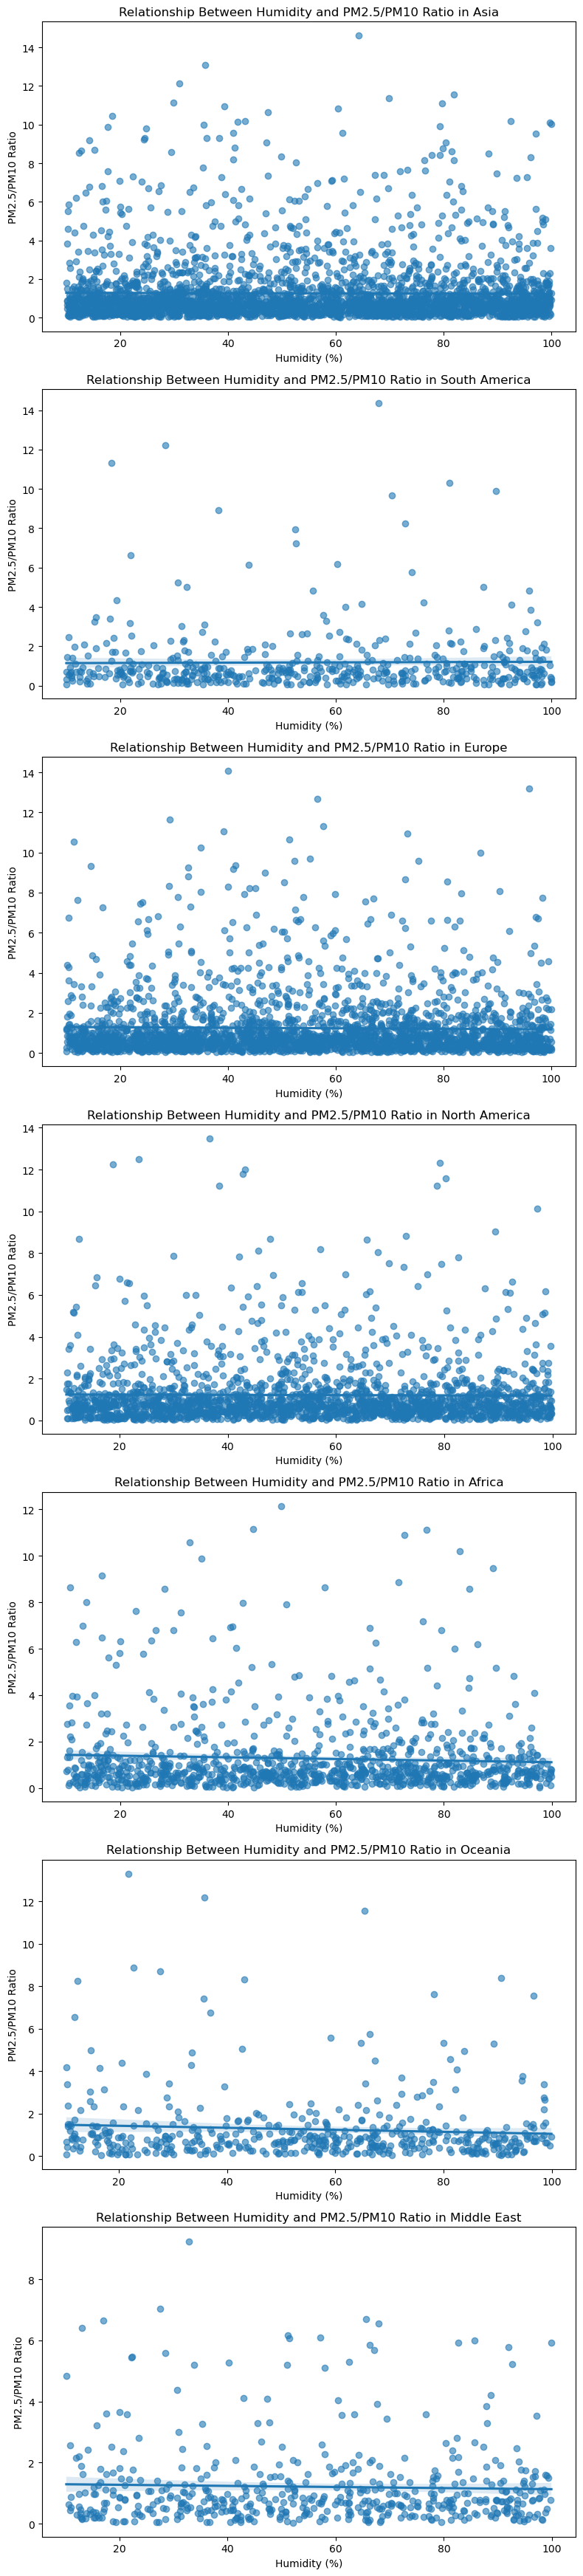

In [71]:
continents = df['Region'].unique()
fig, axes = plt.subplots(nrows=len(continents), ncols=1, figsize=(8, 5 * len(continents)))

if len(continents) == 1:  # If only one continent exists
    axes = [axes]

for i, continent in enumerate(continents):
    continent_data = df[df['Region'] == continent]
    sns.regplot(x='Humidity', y='PM2.5/PM10', data=continent_data, ax=axes[i], scatter_kws={'alpha': 0.6})
    axes[i].set_title(f'Relationship Between Humidity and PM2.5/PM10 Ratio in {continent}')
    axes[i].set_xlabel('Humidity (%)')
    axes[i].set_ylabel('PM2.5/PM10 Ratio')

plt.tight_layout()
plt.show()

## 4.4. Which pollutants contribute the most to overall Air Pollution level in each city?

*Preprocessing steps:*

*Analysis steps:*

In [66]:
pollutant_columns = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']
city_pollutants = data.groupby('City')[pollutant_columns].mean().reset_index()

# Melt the dataframe to a long format for visualization
city_pollutants_melted = city_pollutants.melt(id_vars='City', 
                                              value_vars=pollutant_columns, 
                                              var_name='Pollutant', 
                                              value_name='Average Level')

# Step 8: Visualize pollutant contributions per city
fig_pollutants = px.bar(city_pollutants_melted, 
                        x='City', 
                        y='Average Level',
                        color='Pollutant',
                        title='Average Pollutant Contribution to Air Pollution Level in Each City',
                        labels={'Average Level': 'Average Pollutant Level (µg/m³)', 'City': 'City'},
                        barmode='group',
                        color_discrete_sequence=px.colors.qualitative.Set1)
fig_pollutants.update_layout(template='plotly')
fig_pollutants.show()

## 4.5. How does population density impact air quality?

*Preprocessing steps:*

*Analysis steps:*